In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res.rename(columns={'logq-tph1': 'neglogq-tph1'}, inplace=True)
cat_type = pd.CategoricalDtype(categories=['I', 'II', 'III', 'IV', 'V', 'X'], ordered=True)
res['chromosome'] = res.chromosome.astype(cat_type)

In [4]:
(res['padj-tph1-50'] < 0.05).sum()

1757

In [5]:
(res['padj-tph1-58'] < 0.05).sum()

634

In [10]:
res.columns

Index(['baseMean-50', 'log2FoldChange-50', 'lfcSE-50', 'stat-50', 'pvalue-50',
       'padj-50', 'genename-50', 'neglogq-50', 'baseMean-58',
       'log2FoldChange-58', 'lfcSE-58', 'stat-58', 'pvalue-58', 'padj-58',
       'genename-58', 'neglogq-58', 'baseMean-pqm1', 'log2FoldChange-pqm1',
       'lfcSE-pqm1', 'stat-pqm1', 'pvalue-pqm1', 'padj-pqm1', 'genename-pqm1',
       'logq-pqm1', 'baseMean-tph1-50', 'log2FoldChange-tph1-50',
       'lfcSE-tph1-50', 'stat-tph1-50', 'pvalue-tph1-50', 'padj-tph1-50',
       'genename-tph1-50', 'logq-tph1-50', 'baseMean-tph1-58',
       'log2FoldChange-tph1-58', 'lfcSE-tph1-58', 'stat-tph1-58',
       'pvalue-tph1-58', 'padj-tph1-58', 'genename-tph1-58', 'logq-tph1-58',
       'externalgenename', 'description', 'chromosome', 'startposition',
       'endposition', 'strand', 'Rank', 'Transcript', 'Gene', 'Locus',
       'AvailableExperiments', 'ExpUp', 'ExpDown', 'VoteScore', 'tvalue',
       'pvalue', 'fdr', 'DBE', 'DAE', 'daf16', 'pqm1', 'Size', 'S

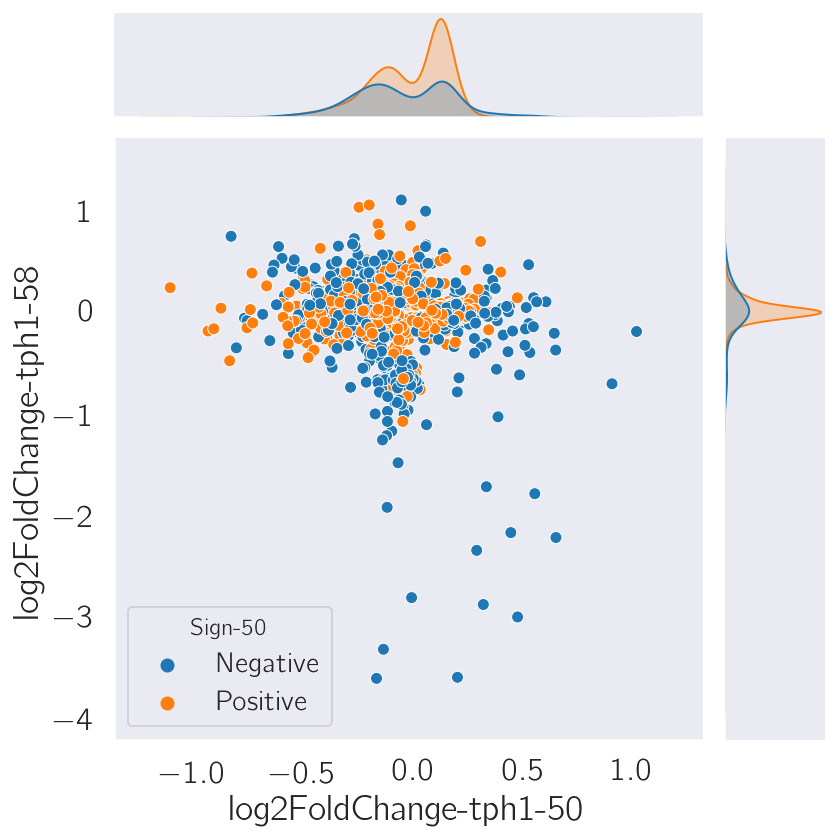

In [25]:
sel = (res['padj-tph1-50'] < 0.05) | (res['padj-tph1-58'] < 0.05)
sns.jointplot(x='log2FoldChange-tph1-50', y='log2FoldChange-tph1-58',
                hue='Sign-50', data=res[sel])

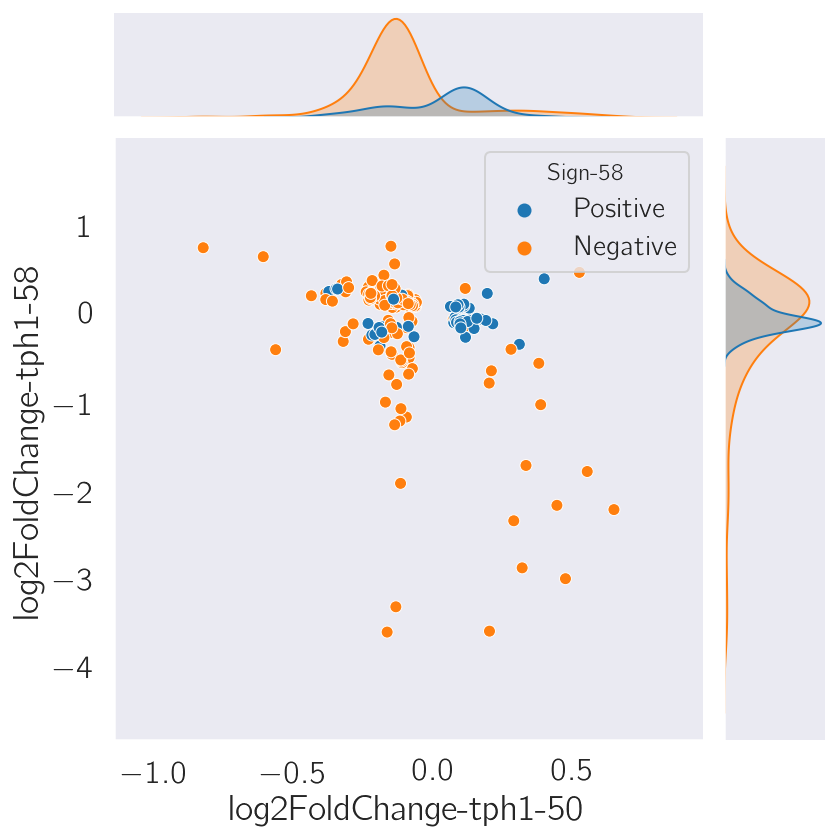

In [26]:
sel = (res['padj-tph1-50'] < 0.05) & (res['padj-tph1-58'] < 0.05)
sns.jointplot(x='log2FoldChange-tph1-50', y='log2FoldChange-tph1-58', hue='Sign-58', data=res[sel])

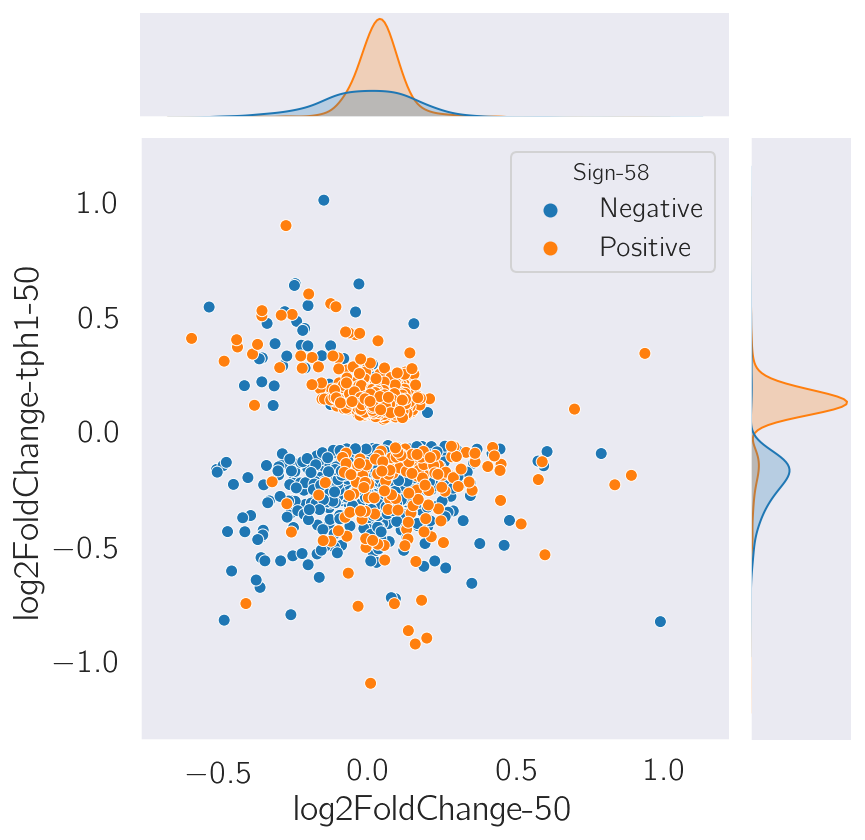

In [27]:
sel = (res['padj-tph1-50'] < 0.05)# & (res['padj-tph1-58'] < 0.05)
sns.jointplot(x='log2FoldChange-50', y='log2FoldChange-tph1-50', hue='Sign-58', data=res[sel].sort_values('Sign-58'))

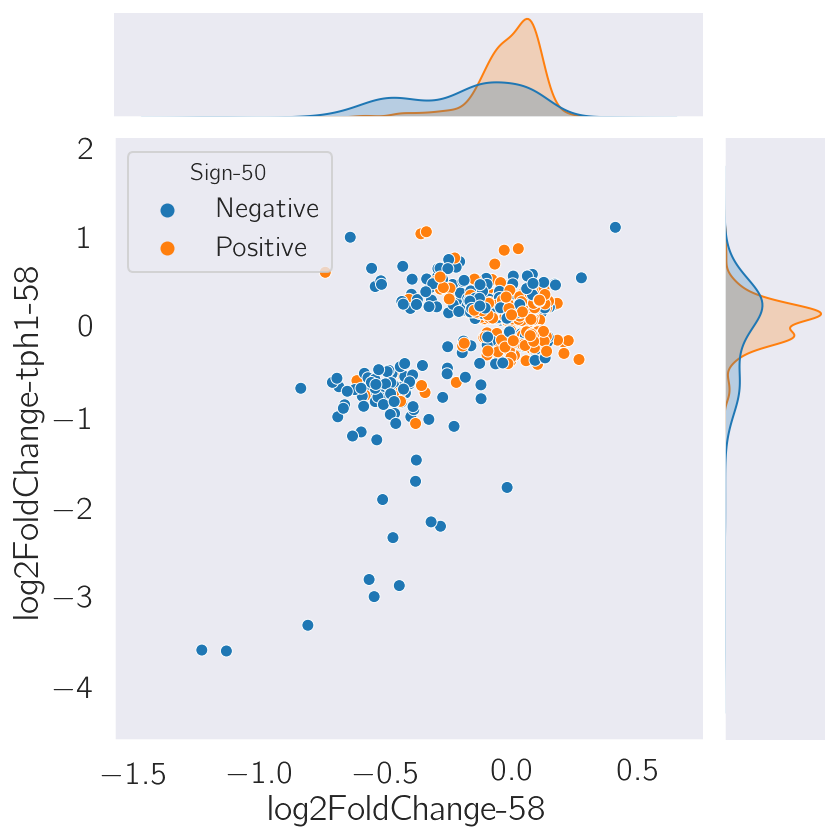

In [28]:
sel = (res['padj-tph1-58'] < 0.05)# & (res['padj-tph1-58'] < 0.05)
sns.jointplot(x='log2FoldChange-58', y='log2FoldChange-tph1-58', hue='Sign-50', data=res[sel])

<AxesSubplot:xlabel='log2FoldChange-50', ylabel='log2FoldChange-tph1-58'>

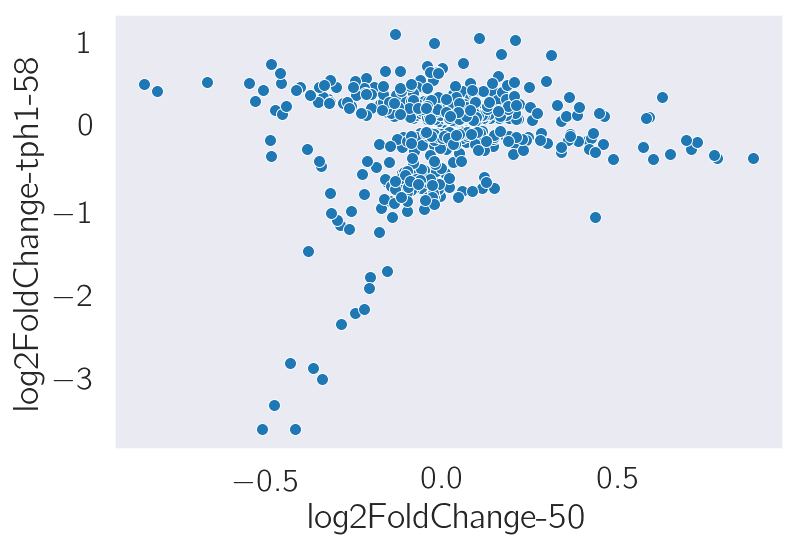

In [22]:
sel = (res['padj-tph1-58'] < 0.05)# & (res['padj-tph1-58'] < 0.05)
sns.scatterplot(x='log2FoldChange-50', y='log2FoldChange-tph1-58', data=res[sel])

<AxesSubplot:xlabel='log2FoldChange-58', ylabel='log2FoldChange-tph1-50'>

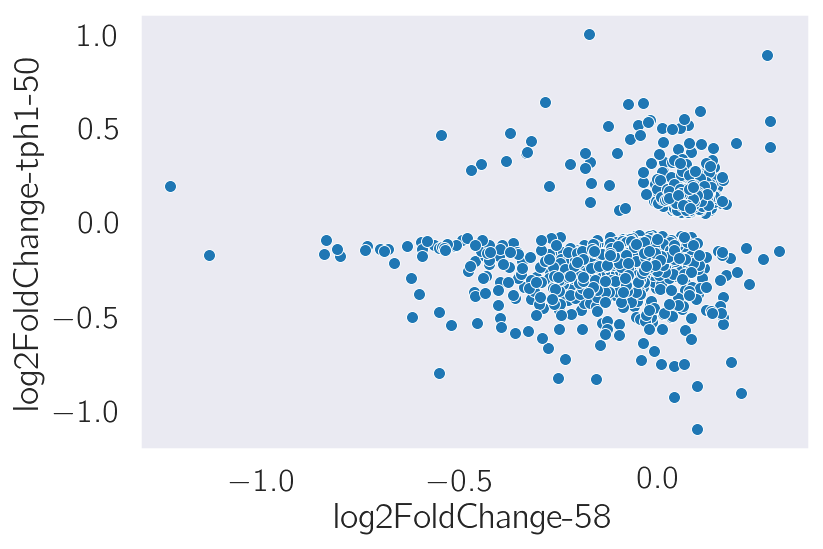

In [23]:
sel = (res['padj-tph1-50'] < 0.05)# & (res['padj-tph1-58'] < 0.05)
sns.scatterplot(x='log2FoldChange-58', y='log2FoldChange-tph1-50', data=res[sel])

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Text(0, 0.5, 'PC2, 17\\%')

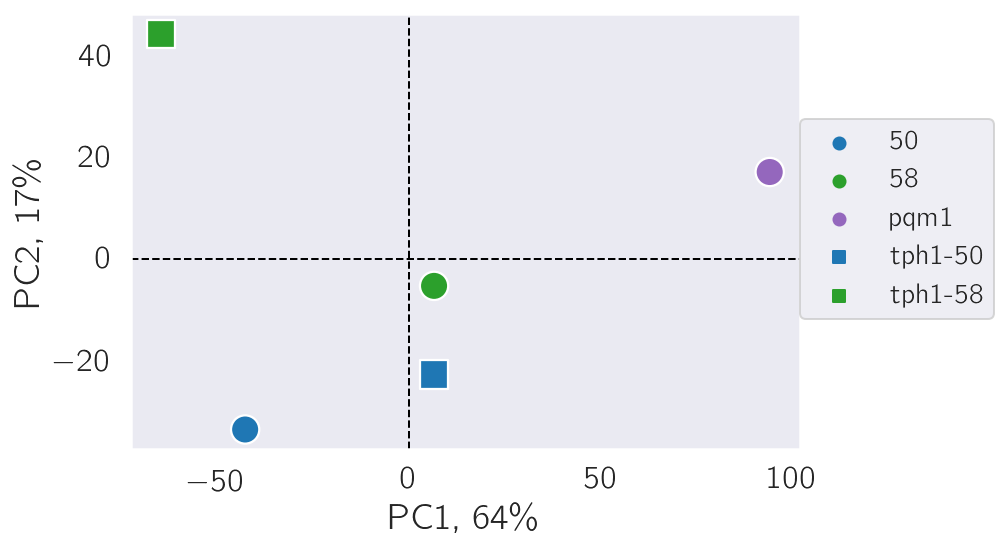

In [89]:
c = ['-50', '-58', '-pqm1', '-tph1-50', '-tph1-58']
fc = ['log2FoldChange' + ci for ci in c]
p = ['padj' + ci for ci in c]

at_least_one = ((res[p] < 0.05).sum(axis=1) >= 2)
FC = res[fc][at_least_one].copy().T

scaled = StandardScaler().fit_transform(FC)
pca = PCA(2)
coords = pca.fit_transform(scaled)

coords = pd.DataFrame(coords, index=FC.index, columns=['PC' + str(i + 1) for i in range(coords.shape[1])])
coords['condition'] = coords.reset_index().rename(columns={'index': 'condition'})\
                            .condition.str.split('-', n=1, expand=True)[1].values

palette={'50': 'tab:blue', '58': 'tab:green', 'pqm1': 'tab:purple', 'tph1-50': 'tab:blue', 'tph1-58': 'tab:green'}
shape = {x: 'o' for x in coords.condition if 'tph1' not in x}
shape['tph1-50'] = 's'
shape['tph1-58'] = 's'
sns.scatterplot(x='PC1', y='PC2', hue='condition', s=200,
                palette=palette, style='condition',
                markers=shape,
                data=coords.reset_index())
plt.legend(loc=(1, .3))

plt.axvline(0, color='black', ls='--', lw=1)
plt.axhline(0, color='black', ls='--', lw=1)

plt.xlabel('PC1, {0:.2g}\%'.format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('PC2, {0:.2g}\%'.format(pca.explained_variance_ratio_[1] * 100))